<a href="https://colab.research.google.com/github/yacanom/MINE-4210_202320_ANALISIS_CON_DEEP_LEARNING/blob/main/Laboratorio%203/MINE4210_ADL2023_LAB3_Pr%C3%A1ctica_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![image](https://docs.google.com/uc?export=download&id=1NUy1Q-abpoV9XYK9qT9t8Mdhj3ZVlveO)


# **Laboratorio 3 - Sesión 2**
## **Transformers**

## **Objetivos**
*   Construir una Red Neuronal basada en una arquitectura Transformers para llevar a cabo un análisis de sentimientos, ejemplificando así la aplicación de modelos de procesamiento del lenguaje natural.
*   Conocer como implemntar una red neuronal de NLP con transformers tanto en Keras como en Huggingface.


## **Problema**
- Se requiere realizar el análisis de sentimientos de un conjunto de frases del sector financiero como parte de la evaluación del sentimiento del mercado y la reputación de empresas, con el objetivo de tomar decisiones de inversión informadas.

## 0. Importación de Librerías
Para la transformación de los datos, así como para el entrenamiento de los modelos y la visualización de los resultados, se importan las siguientes librerías:

In [1]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 14.0 MB/s eta 0:00:00


In [2]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 77.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 60.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 36.0 MB/s eta 0:00:00


In [3]:
pip install "tf-models-official==2.13.*"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 58.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 479.7/479.7 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 49.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 41.1 MB/s eta 0:00:00
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16162 sha256=252323303c08afc7641c618588b3063d9ab3c9495025931e9615cebdb46d9ce1
 

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
import keras_tuner as kt

from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, LSTM, Flatten
from transformers import TFBertForSequenceClassification, BertTokenizer

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

print('Tensorflow version:', tf.__version__)

import os
import shutil
import tensorflow_hub as hub
import tensorflow_text as text

import matplotlib.pyplot as plt

tf.get_logger().setLevel('ERROR')

Using TensorFlow backend
Tensorflow version: 2.13.1


##**1. Entendimiento del Negocio**

Una empresa del sector financiero requiere realizar el análisis de sentimientos de un conjunto de frases del sector para poder hacer evaluación del sentimiento del mercado y la reputación de las empresas.

En primer lugar, este análisis proporciona información valiosa para la toma de decisiones de inversión. Al evaluar el sentimiento del mercado a partir de las opiniones y comentarios expresados en las frases, los inversores pueden tomar decisiones más informadas. Esto permite identificar tendencias emergentes, detectar posibles riesgos y oportunidades, y ajustar sus carteras de inversión de acuerdo a la dinámica del mercado.

Los datos se toman de https://www.kaggle.com/datasets/sbhatti/financial-sentiment-analysis

##**2. Perfilamiento y entendimiento de los datos**

In [5]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d sbhatti/financial-sentiment-analysis
! unzip /content/financial-sentiment-analysis.zip

100% 276k/276k [00:00<00:00, 845kB/s]
100% 276k/276k [00:00<00:00, 844kB/s]
Archive:  /content/financial-sentiment-analysis.zip
  inflating: data.csv                


In [6]:
data = pd.read_csv('/content/data.csv')
data.head(10)

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
5,$SPY wouldn't be surprised to see a green close,positive
6,Shell's $70 Billion BG Deal Meets Shareholder ...,negative
7,SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANG...,negative
8,Kone 's net sales rose by some 14 % year-on-ye...,positive
9,The Stockmann department store will have a tot...,neutral


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


Realizamos la revisión de texto para cada uno de los sentimientos:

In [8]:
unique_sentiments = data['Sentiment'].unique()

for sentiment in unique_sentiments:
    row = data[data['Sentiment'] == sentiment].iloc[0]  # Obtener la primera fila con el valor de sentimiento específico
    print("Sentiment:", sentiment)
    print("Sentence:", row['Sentence'])
    print()


Sentiment: positive
Sentence: The GeoSolutions technology will leverage Benefon 's GPS solutions by providing Location Based Search Technology , a Communities Platform , location relevant multimedia content and a new and powerful commercial model .

Sentiment: negative
Sentence: $ESI on lows, down $1.50 to $2.50 BK a real possibility

Sentiment: neutral
Sentence: According to the Finnish-Russian Chamber of Commerce , all the major construction companies of Finland are operating in Russia .



In [9]:
data["Sentiment"].value_counts()

neutral     3130
positive    1852
negative     860
Name: Sentiment, dtype: int64

##**3. Preparación de los Datos**

Ahora vamos a pasar el sentimiento (clase) a un valor entero usando LabelEncoder

In [10]:
label_encoder = LabelEncoder()
data['Sentiment'] = label_encoder.fit_transform(data['Sentiment'])

etiquetas_unicas = label_encoder.classes_
for valor_numerico, etiqueta_original in enumerate(etiquetas_unicas):
    print(f'Valor numérico: {valor_numerico}, Etiqueta original: {etiqueta_original}')

Valor numérico: 0, Etiqueta original: negative
Valor numérico: 1, Etiqueta original: neutral
Valor numérico: 2, Etiqueta original: positive


Hacemos la división de los conjuntos para entrenamiento, validación y prueba:

In [11]:
# Divide los datos en entrenamiento y prueba
train, test = train_test_split(data, test_size=0.2, stratify=data['Sentiment'], random_state=42, shuffle = True)

# Ahora divide el conjunto de entrenamiento en entrenamiento y validación
train, val = train_test_split(train, test_size=0.2, stratify=train['Sentiment'], random_state=42, shuffle = True)

print("Tamaño de datos de entrenamiento:", train.shape)
print("Tamaño de datos de validación:", val.shape)
print("Tamaño de datos de prueba:", test.shape)

train

Tamaño de datos de entrenamiento: (3738, 2)
Tamaño de datos de validación: (935, 2)
Tamaño de datos de prueba: (1169, 2)


,Sentence,Sentiment
3097,"Digia will also set up two subsidiaries , Digi...",1
5048,$BBRY Sierra. Has a great cash balance and imp...,2
5727,"Britain's FTSE gains, Land Securities up after...",2
185,The Finnish company sold its UK operation - co...,1
4265,Russian Media Ventures ' minority shareholder ...,1
...,...,...
326,( I&H ) in a move to enhance growth .,2
2821,"In addition , a further 29 employees can be la...",0
4365,"The paper industry 's de-inking sludge , which...",1
1603,$JE LOOKS like we are bouncing. Would be nice...,2


Revisamos la dristibución de sentimientos del conjunto de entrenamiento:

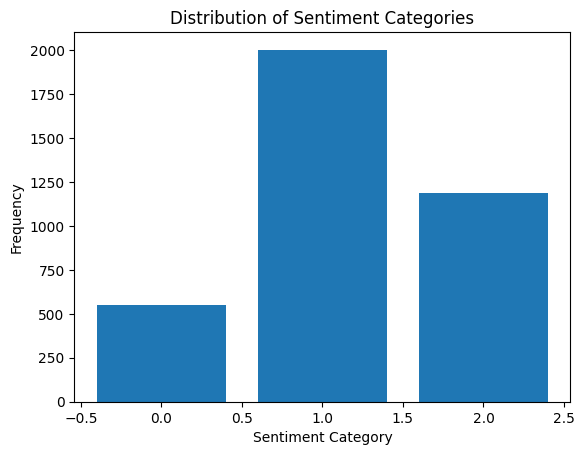

In [12]:
# Create a bar plot to visualize the distribution
unique, counts = np.unique(train['Sentiment'], return_counts=True)
plt.bar(unique, counts)
plt.xlabel('Sentiment Category')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Categories')
plt.show()

Separamos las oraciones y el sentimiento que representan.


In [13]:
X_train, X_test, X_val= train['Sentence'], test['Sentence'], val['Sentence']
y_train, y_test, y_val= train['Sentiment'], test['Sentiment'], val['Sentiment']

print("x_train", X_train.shape, " y_train:", y_train.shape)
print("x_test:", X_test.shape, "y_test", y_test.shape)
print("x_val", X_val.shape, "y_val:", y_val.shape)

X_train

x_train (3738,)  y_train: (3738,)
x_test: (1169,) y_test (1169,)
x_val (935,) y_val: (935,)


3097    Digia will also set up two subsidiaries , Digi...
5048    $BBRY Sierra. Has a great cash balance and imp...
5727    Britain's FTSE gains, Land Securities up after...
185     The Finnish company sold its UK operation - co...
4265    Russian Media Ventures ' minority shareholder ...
                              ...                        
326                 ( I&H ) in a move to enhance growth .
2821    In addition , a further 29 employees can be la...
4365    The paper industry 's de-inking sludge , which...
1603    $JE LOOKS like we are bouncing.  Would be nice...
200     A survey conducted by Taloustutkimus for Sampo...
Name: Sentence, Length: 3738, dtype: object

Una de las ventajas de utilizar transformers es que también incorporan una capa de preprocesamiento de datos, lo que simplifica el proceso para utilizarlos.

##**4. Modelamiento**

 Con el siguiente código podemos seleccionar uno de los modelos BERT (Bidirectional Encoder Representations from Transformers) y su correspondiente modelo de preprocesamiento utilizando TensorFlow Hub.

###4.1 bert_multi_cased

 Es una variante multilingüe del modelo BERT (Bidirectional Encoder Representations from Transformers) desarrollado por Google. "Cased" indica que el modelo distingue entre mayúsculas y minúsculas en los textos, lo que es importante en idiomas que hacen esta distinción, como alemán o francés.

In [ ]:
#bert_model_name = 'bert_en_uncased_L-12_H-768_A-12'
#bert_model_name = 'bert_en_cased_L-12_H-768_A-12'
bert_model_name = 'bert_multi_cased_L-12_H-768_A-12'

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3


Cargamos el preprocesamiento que necesitamos para usar BERT:

In [ ]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

A continuación el preprocesmiento de un texto de prueba:

*  Keys: Imprime las claves del diccionario de salida.
*  Shape: Muestra la forma del tensor "input_word_ids".
*  Word Ids: Muestra los primeros 12 elementos del tensor "input_word_ids".
*  Input Mask: Muestra los primeros 12 elementos del tensor "input_mask".
*  Type Ids: Muestra los primeros 12 elementos del tensor "input_type_ids".

In [ ]:
text_test = ['$ESI on lows, down $1.50 to $2.50 BK a real possibility']
text_preprocessed = bert_preprocess_model(text_test)

print(f'Keys       : {list(text_preprocessed.keys())}')
print(f'Shape      : {text_preprocessed["input_word_ids"].shape}')
print(f'Word Ids   : {text_preprocessed["input_word_ids"][0, :12]}')
print(f'Input Mask : {text_preprocessed["input_mask"][0, :12]}')
print(f'Type Ids   : {text_preprocessed["input_type_ids"][0, :12]}')

Keys       : ['input_mask', 'input_type_ids', 'input_word_ids']
Shape      : (1, 128)
Word Ids   : [  101   109 49004 11281 10135 15626 10107   117 12935   109   122   119]
Input Mask : [1 1 1 1 1 1 1 1 1 1 1 1]
Type Ids   : [0 0 0 0 0 0 0 0 0 0 0 0]


Ahora cargamos nuestro modelo Bert

In [ ]:
bert_model = hub.KerasLayer(tfhub_handle_encoder)

El siguiente código utiliza un modelo BERT preentrenado para procesar datos previamente preprocesados y extraer representaciones contextuales de texto.

In [ ]:
bert_results = bert_model(text_preprocessed)

print(f'Loaded BERT: {tfhub_handle_encoder}')
print(f'Pooled Outputs Shape:{bert_results["pooled_output"].shape}')
print(f'Pooled Outputs Values:{bert_results["pooled_output"][0, :12]}')
print(f'Sequence Outputs Shape:{bert_results["sequence_output"].shape}')
print(f'Sequence Outputs Values:{bert_results["sequence_output"][0, :12]}')

Loaded BERT: https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3
Pooled Outputs Shape:(1, 768)
Pooled Outputs Values:[ 0.25642753 -0.24052909  0.38639328 -0.38650325 -0.12551539  0.37159094
  0.39942417  0.17532933 -0.49961782  0.2707335  -0.32194582 -0.32571584]
Sequence Outputs Shape:(1, 128, 768)
Sequence Outputs Values:[[ 0.00776139  0.1517258  -0.04908824 ...  0.37667593  0.4059772
   0.0634757 ]
 [-0.28310037  0.00849479  0.22910656 ...  0.19306394  0.9363987
  -0.32489976]
 [-0.13739087 -0.36386037  0.34673014 ... -0.0873533   0.7559305
  -0.2317127 ]
 ...
 [-0.11855112 -0.2610041  -0.68694377 ...  0.5899118   1.5139989
  -0.4682492 ]
 [ 0.41455725 -0.12597603 -0.3053306  ...  0.82987154  0.46787086
  -0.28940696]
 [-0.22332022 -0.2707485  -0.15629277 ...  0.7347752   1.0121037
  -0.21981587]]


El siguiente código se centra en la construcción de un modelo de procesamiento de lenguaje natural que aprovecha tanto las capacidades de un modelo BERT preentrenado como una red neuronal personalizada.

In [ ]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessing_layer = bert_preprocess_model(text_input)
outputs = bert_model(preprocessing_layer)

# Neural network layers
#l = tf.keras.layers.Dropout(0.1, name="dropout")
l = tf.keras.layers.Dense(1024, activation='sigmoid', name="capaOculta1")(outputs['pooled_output'])
l = tf.keras.layers.Dropout(0.1, name="dropout")(l)
l = tf.keras.layers.Dense(3, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [ ]:
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text (InputLayer)           [(None,)]                    0         []                            
                                                                                                  
 keras_layer (KerasLayer)    {'input_mask': (None, 128)   0         ['text[0][0]']                
                             , 'input_type_ids': (None,                                           
                              128),                                                               
                              'input_word_ids': (None,                                            
                             128)}                                                                
                                                                                            

In [ ]:
metrics = ['accuracy']

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=metrics)

In [ ]:
model.fit(X_train, y_train,
          validation_data = (X_val, y_val),
          epochs=20,
          callbacks= EarlyStopping(monitor='val_accuracy', patience=3))

Epoch 1/20
117/117 [==============================] - 74s 577ms/step - loss: 0.9477 - accuracy: 0.5787 - val_loss: 0.9029 - val_accuracy: 0.5872
Epoch 2/20
117/117 [==============================] - 52s 441ms/step - loss: 0.8708 - accuracy: 0.6059 - val_loss: 0.8107 - val_accuracy: 0.6353
Epoch 3/20
117/117 [==============================] - 51s 436ms/step - loss: 0.8209 - accuracy: 0.6306 - val_loss: 0.8104 - val_accuracy: 0.6118
Epoch 4/20
117/117 [==============================] - 51s 441ms/step - loss: 0.7872 - accuracy: 0.6461 - val_loss: 0.8718 - val_accuracy: 0.6096
Epoch 5/20
117/117 [==============================] - 61s 522ms/step - loss: 0.7781 - accuracy: 0.6437 - val_loss: 0.7776 - val_accuracy: 0.6481
Epoch 6/20
117/117 [==============================] - 52s 443ms/step - loss: 0.7998 - accuracy: 0.6300 - val_loss: 0.8078 - val_accuracy: 0.6086
Epoch 7/20
117/117 [==============================] - 51s 438ms/step - loss: 0.7538 - accuracy: 0.6546 - val_loss: 0.7720 - val_ac

#### Evaluación

In [ ]:
y_pred = model.predict(X_train)
y_pred = np.argmax(y_pred, axis=1)

print(classification_report(y_train, y_pred))

117/117 [==============================] - 40s 341ms/step
              precision    recall  f1-score   support

           0       0.54      0.04      0.07       550
           1       0.74      0.85      0.79      2003
           2       0.56      0.66      0.61      1185

    accuracy                           0.67      3738
   macro avg       0.61      0.52      0.49      3738
weighted avg       0.65      0.67      0.63      3738



In [ ]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred))

37/37 [==============================] - 13s 349ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       172
           1       0.71      0.83      0.77       626
           2       0.55      0.64      0.59       371

    accuracy                           0.65      1169
   macro avg       0.42      0.49      0.45      1169
weighted avg       0.55      0.65      0.60      1169



###4.2 albert_en_base

El modelo "ALBERT en base" es una versión del modelo de lenguaje ALBERT (A Lite BERT) diseñado por Google, utiliza técnicas de compresión y entrenamiento compartido para reducir el número de parámetros en comparación con modelos previos como BERT, mientras mantiene o incluso mejora el rendimiento en una variedad de tareas de NLP. Esto hace que ALBERT sea una opción eficiente y efectiva para tareas como la clasificación de texto, la generación de lenguaje natural y la extracción de información en inglés, ofreciendo un equilibrio óptimo entre tamaño y rendimiento.

In [ ]:
#bert_model_name = 'bert_en_uncased_L-12_H-768_A-12'
#bert_model_name = 'bert_en_cased_L-12_H-768_A-12'
bert_model_name = 'albert_en_base'

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/albert_en_base/2
Preprocess model auto-selected: https://tfhub.dev/tensorflow/albert_en_preprocess/3


In [ ]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

In [ ]:
bert_model = hub.KerasLayer(tfhub_handle_encoder)

In [ ]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessing_layer = bert_preprocess_model(text_input)
outputs = bert_model(preprocessing_layer)

# Neural network layers
#l = tf.keras.layers.Dropout(0.1, name="dropout")
l = tf.keras.layers.Dense(512, activation='sigmoid', name="capaOculta1")(outputs['pooled_output'])
l = tf.keras.layers.Dropout(0.1, name="dropout")(l)
l = tf.keras.layers.Dense(3, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [ ]:
metrics = ['accuracy']

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=metrics)

In [ ]:
model.fit(X_train, y_train,
          validation_data = (X_val, y_val),
          epochs=20,
          callbacks= EarlyStopping(monitor='val_accuracy', patience=3))

Epoch 1/20
117/117 [==============================] - 71s 536ms/step - loss: 0.9415 - accuracy: 0.5728 - val_loss: 0.8991 - val_accuracy: 0.6139
Epoch 2/20
117/117 [==============================] - 61s 525ms/step - loss: 0.8755 - accuracy: 0.6033 - val_loss: 0.9014 - val_accuracy: 0.5722
Epoch 3/20
117/117 [==============================] - 51s 439ms/step - loss: 0.8424 - accuracy: 0.6231 - val_loss: 0.8203 - val_accuracy: 0.6321
Epoch 4/20
117/117 [==============================] - 51s 437ms/step - loss: 0.8495 - accuracy: 0.6145 - val_loss: 0.8552 - val_accuracy: 0.6182
Epoch 5/20
117/117 [==============================] - 51s 441ms/step - loss: 0.8165 - accuracy: 0.6316 - val_loss: 0.7940 - val_accuracy: 0.6374
Epoch 6/20
117/117 [==============================] - 50s 432ms/step - loss: 0.7986 - accuracy: 0.6404 - val_loss: 0.7882 - val_accuracy: 0.6364
Epoch 7/20
117/117 [==============================] - 51s 434ms/step - loss: 0.8001 - accuracy: 0.6418 - val_loss: 0.8265 - val_ac

#### Evaluación

In [ ]:
y_pred = model.predict(X_train)
y_pred = np.argmax(y_pred, axis=1)

print(classification_report(y_train, y_pred))

117/117 [==============================] - 40s 343ms/step
              precision    recall  f1-score   support

           0       0.41      0.36      0.38       550
           1       0.79      0.67      0.73      2003
           2       0.50      0.66      0.57      1185

    accuracy                           0.62      3738
   macro avg       0.57      0.56      0.56      3738
weighted avg       0.64      0.62      0.63      3738



In [ ]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred))

37/37 [==============================] - 12s 340ms/step
              precision    recall  f1-score   support

           0       0.41      0.37      0.39       172
           1       0.78      0.63      0.70       626
           2       0.46      0.63      0.53       371

    accuracy                           0.59      1169
   macro avg       0.55      0.54      0.54      1169
weighted avg       0.62      0.59      0.60      1169



### 4.3 experts_wiki_books

In [ ]:
#bert_model_name = 'bert_en_uncased_L-12_H-768_A-12'
#bert_model_name = 'bert_en_cased_L-12_H-768_A-12'
bert_model_name = 'experts_wiki_books'

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/google/experts/bert/wiki_books/2
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


In [ ]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

In [ ]:
bert_model = hub.KerasLayer(tfhub_handle_encoder)

In [ ]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessing_layer = bert_preprocess_model(text_input)
outputs = bert_model(preprocessing_layer)

# Neural network layers
#l = tf.keras.layers.Dropout(0.1, name="dropout")
l = tf.keras.layers.Dense(512, activation='sigmoid', name="capaOculta1")(outputs['pooled_output'])
l = tf.keras.layers.Dropout(0.1, name="dropout")(l)
l = tf.keras.layers.Dense(3, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [ ]:
metrics = ['accuracy']

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=metrics)

In [ ]:
model.fit(X_train, y_train,
          validation_data = (X_val, y_val),
          epochs=20,
          callbacks= EarlyStopping(monitor='val_accuracy', patience=4))

Epoch 1/20
117/117 [==============================] - 62s 463ms/step - loss: 0.9163 - accuracy: 0.5869 - val_loss: 0.8476 - val_accuracy: 0.6406
Epoch 2/20
117/117 [==============================] - 51s 437ms/step - loss: 0.8378 - accuracy: 0.6166 - val_loss: 0.8355 - val_accuracy: 0.6064
Epoch 3/20
117/117 [==============================] - 51s 436ms/step - loss: 0.7850 - accuracy: 0.6533 - val_loss: 0.7889 - val_accuracy: 0.6492
Epoch 4/20
117/117 [==============================] - 51s 437ms/step - loss: 0.7673 - accuracy: 0.6562 - val_loss: 0.7926 - val_accuracy: 0.6524
Epoch 5/20
117/117 [==============================] - 52s 444ms/step - loss: 0.7571 - accuracy: 0.6605 - val_loss: 0.8905 - val_accuracy: 0.5957
Epoch 6/20
117/117 [==============================] - 53s 452ms/step - loss: 0.7285 - accuracy: 0.6701 - val_loss: 0.7700 - val_accuracy: 0.6417
Epoch 7/20
117/117 [==============================] - 61s 524ms/step - loss: 0.6939 - accuracy: 0.6894 - val_loss: 0.7632 - val_ac

#### Evaluación

In [ ]:
y_pred = model.predict(X_train)
y_pred = np.argmax(y_pred, axis=1)

print(classification_report(y_train, y_pred))

117/117 [==============================] - 41s 344ms/step
              precision    recall  f1-score   support

           0       0.50      0.38      0.43       550
           1       0.85      0.73      0.79      2003
           2       0.59      0.79      0.68      1185

    accuracy                           0.70      3738
   macro avg       0.65      0.63      0.63      3738
weighted avg       0.71      0.70      0.70      3738



In [ ]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred))

37/37 [==============================] - 13s 349ms/step
              precision    recall  f1-score   support

           0       0.36      0.24      0.29       172
           1       0.80      0.73      0.76       626
           2       0.57      0.74      0.65       371

    accuracy                           0.66      1169
   macro avg       0.58      0.57      0.56      1169
weighted avg       0.66      0.66      0.66      1169



### 4.4 Lambert

BERT entrenado con LAMB(Layer-wise Adaptive Moments optimizer for Batch training, un optimizador de gradiente descendente estocástico) y técnicas de RoBERTa (Robustly Optimized BERT Approach).

In [ ]:
tfhub_handle_encoder = 'https://tfhub.dev/tensorflow/lambert_en_uncased_L-24_H-1024_A-16/2'

tfhub_handle_preprocess = 'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'


print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/lambert_en_uncased_L-24_H-1024_A-16/2
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


In [ ]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

In [ ]:
bert_model = hub.KerasLayer(tfhub_handle_encoder)

In [ ]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessing_layer = bert_preprocess_model(text_input)
outputs = bert_model(preprocessing_layer)

# Neural network layers
#l = tf.keras.layers.Dropout(0.1, name="dropout")
l = tf.keras.layers.Dense(512, activation='sigmoid', name="capaOculta1")(outputs['pooled_output'])
l = tf.keras.layers.Dropout(0.2, name="dropout")(l)
l = tf.keras.layers.Dense(3, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [ ]:
metrics = ['accuracy']

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=metrics)

In [ ]:
model.fit(X_train, y_train,
          validation_data = (X_val, y_val),
          epochs=20,
          #callbacks= EarlyStopping(monitor='val_accuracy', patience=4)
          )

Epoch 1/20
117/117 [==============================] - 169s 1s/step - loss: 0.8959 - accuracy: 0.5902 - val_loss: 0.8004 - val_accuracy: 0.6396
Epoch 2/20
117/117 [==============================] - 162s 1s/step - loss: 0.7685 - accuracy: 0.6597 - val_loss: 0.7841 - val_accuracy: 0.6642
Epoch 3/20
117/117 [==============================] - 151s 1s/step - loss: 0.7229 - accuracy: 0.6814 - val_loss: 0.7731 - val_accuracy: 0.6492
Epoch 4/20
117/117 [==============================] - 160s 1s/step - loss: 0.6996 - accuracy: 0.6846 - val_loss: 0.7946 - val_accuracy: 0.6503
Epoch 5/20
117/117 [==============================] - 151s 1s/step - loss: 0.6753 - accuracy: 0.7084 - val_loss: 0.7879 - val_accuracy: 0.6439
Epoch 6/20
117/117 [==============================] - 160s 1s/step - loss: 0.6717 - accuracy: 0.7012 - val_loss: 0.8133 - val_accuracy: 0.6342
Epoch 7/20
117/117 [==============================] - 151s 1s/step - loss: 0.6541 - accuracy: 0.7057 - val_loss: 0.7894 - val_accuracy: 0.6652

#### Evaluación

In [ ]:
y_pred = model.predict(X_train)
y_pred = np.argmax(y_pred, axis=1)

print(classification_report(y_train, y_pred))

117/117 [==============================] - 120s 1s/step
              precision    recall  f1-score   support

           0       0.79      0.65      0.72       550
           1       0.88      0.93      0.91      2003
           2       0.94      0.93      0.93      1185

    accuracy                           0.89      3738
   macro avg       0.87      0.84      0.85      3738
weighted avg       0.89      0.89      0.89      3738



In [ ]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred))

37/37 [==============================] - 38s 1s/step
              precision    recall  f1-score   support

           0       0.33      0.24      0.28       172
           1       0.73      0.81      0.77       626
           2       0.71      0.67      0.69       371

    accuracy                           0.68      1169
   macro avg       0.59      0.57      0.58      1169
weighted avg       0.67      0.68      0.67      1169



###4.5 Modelo distilbert huggingface

Es un modelo de lenguaje natural basado en la arquitectura de BERT, pero más pequeño, rápido y económico. Fue propuesto por Hugging Face en 2019. El modelo fue entrenado mediante destilación de BERT base y tiene un 40% menos de parámetros que bert-base-uncased, corre un 60% más rápido y preserva más del 95% del rendimiento de BERT.

Para trabajar con los transformes de huggingface se utiliza la librería transformers, en este caso importamos el tokenizador (pro-proceamiento que requiere el transformers y el modelo)

In [14]:
import tensorflow as tf
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification
from sklearn.model_selection import train_test_split

Hacemos el preprocesamiento de nuestros conjuntos de datos:

In [15]:
# Tokenización
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
X_train = [tokenizer.encode(text, add_special_tokens=True, truncation=True, max_length=128) for text in X_train]
X_val = [tokenizer.encode(text, add_special_tokens=True, truncation=True, max_length=128) for text in X_val]
X_test = [tokenizer.encode(text, add_special_tokens=True, truncation=True, max_length=128) for text in X_test]


Ahora vamos a hacer un padding, lo cual es una práctica común en el procesamiento de texto para asegurar que todas las secuencias de texto tengan la misma longitud.

In [17]:
max_sequence_length = max(len(seq) for seq in X_train)

In [18]:
#
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_sequence_length, padding='post', truncating='post')
X_val = tf.keras.preprocessing.sequence.pad_sequences(X_val, maxlen=max_sequence_length, padding='post', truncating='post')
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_sequence_length, padding='post', truncating='post')

Ahora generamos nuestro modelo a partir del modelo DistilBERT

In [19]:
# Crear el modelo DistilBERT
model = TFDistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased")

# Agregar una capa de clasificación explícita
classification_layer = tf.keras.layers.Dense(3, activation='softmax')  # 'num_classes' es el número de clases en tu tarea de clasificación

# Crear el modelo combinado
input_ids = tf.keras.layers.Input(shape=(max_sequence_length,), dtype=tf.int32)
outputs = model(input_ids)[0]  # Salidas de la capa de logits
outputs = classification_layer(outputs)

combined_model = tf.keras.Model(inputs=input_ids, outputs=outputs)

# Compilar el modelo
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)  # from_logits=False ya que estamos usando 'softmax' en la capa de clasificación
combined_model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])



Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_transform.weight']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [20]:
# Entrenamiento
history = combined_model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=15,
    batch_size=16,
    callbacks= EarlyStopping(monitor='val_accuracy', patience=3)
)

Epoch 1/15
234/234 [==============================] - 104s 265ms/step - loss: 0.8140 - accuracy: 0.6220 - val_loss: 0.5969 - val_accuracy: 0.7604
Epoch 2/15
234/234 [==============================] - 46s 196ms/step - loss: 0.4715 - accuracy: 0.8063 - val_loss: 0.4892 - val_accuracy: 0.7807
Epoch 3/15
234/234 [==============================] - 47s 202ms/step - loss: 0.3395 - accuracy: 0.8513 - val_loss: 0.5192 - val_accuracy: 0.7679
Epoch 4/15
234/234 [==============================] - 44s 187ms/step - loss: 0.2554 - accuracy: 0.8745 - val_loss: 0.5045 - val_accuracy: 0.7743
Epoch 5/15
234/234 [==============================] - 47s 201ms/step - loss: 0.2049 - accuracy: 0.8975 - val_loss: 0.5405 - val_accuracy: 0.7775


#### Evaluación

In [21]:
# Evaluación
results = combined_model.evaluate(X_test, y_test)
print("Loss:", results[0])
print("Accuracy:", results[1])

37/37 [==============================] - 5s 118ms/step - loss: 0.5270 - accuracy: 0.7716
Loss: 0.5269625782966614
Accuracy: 0.7715996503829956


In [22]:
y_pred = combined_model.predict(X_train)
y_pred = np.argmax(y_pred, axis=1)

print(classification_report(y_train, y_pred))

117/117 [==============================] - 17s 113ms/step
              precision    recall  f1-score   support

           0       0.65      0.98      0.78       550
           1       0.99      0.85      0.92      2003
           2       1.00      0.99      0.99      1185

    accuracy                           0.92      3738
   macro avg       0.88      0.94      0.90      3738
weighted avg       0.94      0.92      0.92      3738



In [23]:
y_pred = combined_model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred))

37/37 [==============================] - 4s 107ms/step
              precision    recall  f1-score   support

           0       0.47      0.66      0.55       172
           1       0.85      0.77      0.81       626
           2       0.85      0.82      0.84       371

    accuracy                           0.77      1169
   macro avg       0.72      0.75      0.73      1169
weighted avg       0.79      0.77      0.78      1169

